In [1]:
#import dependencies and libraries
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
print(engine.table_names())

['measurement', 'station']


In [7]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#use inspector to see what columns it has
inspector = inspect(engine)
columns =inspector.get_columns('measurement')
for c in columns:
    print(c['name'])

id
station
date
prcp
tobs


In [10]:
inspector = inspect(engine)
columns =inspector.get_columns('station')
for c in columns:
    print(c['name'])

id
station
name
latitude
longitude
elevation


In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [18]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).\
    order_by(Measurement.date.desc()).all()
prcp_data

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 2.0),
 ('2017-08-23', 11.4),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 12.7),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.5),
 ('2017-08-21', None),
 ('2017-08-21', 14.2),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.3),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 2.3),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 1.5),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 1.3),
 ('2017-08-17', 0.3),
 ('2017-08-17', 3.3),
 ('2017-08-16', 0.0),
 ('2017-08-16', 1.8),
 ('2017-08-16', 3.0),
 ('2017-08-16', 10.7),
 ('2017-08-15', 0.5),
 ('2017-08-15', 0.0),
 ('2017-08-15', 1.5),
 ('2017-08-15', 8.1),
 ('2017-08-15', 10.7),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.3),
 ('2017-08-14', 2.0),
 ('2017-08-14', 0.0),
 ('2017-08-14', 5.6),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),

In [19]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
column = ['Date', 'Precipitation']
df = pd.DataFrame(prcp_data, columns=column)
df

,Date,Precipitation
0,2017-08-23,0.0
1,2017-08-23,0.0
2,2017-08-23,2.0
3,2017-08-23,11.4
4,2017-08-22,0.0
...,...,...
2225,2016-08-23,1.3
2226,2016-08-23,NaN
2227,2016-08-23,0.5
2228,2016-08-23,45.5


In [20]:
#Clean data to remove NaN
df = df.dropna()
df

,Date,Precipitation
0,2017-08-23,0.0
1,2017-08-23,0.0
2,2017-08-23,2.0
3,2017-08-23,11.4
4,2017-08-22,0.0
...,...,...
2224,2016-08-23,3.8
2225,2016-08-23,1.3
2227,2016-08-23,0.5
2228,2016-08-23,45.5


In [21]:
# Sort the dataframe by date
df_dates = df.sort_values(by=['Date'])
df_dates

,Date,Precipitation
2229,2016-08-23,17.8
2223,2016-08-23,0.0
2224,2016-08-23,3.8
2228,2016-08-23,45.5
2227,2016-08-23,0.5
...,...,...
4,2017-08-22,0.0
3,2017-08-23,11.4
2,2017-08-23,2.0
1,2017-08-23,0.0


Text(0, 0.5, 'Precipitation (mm)')

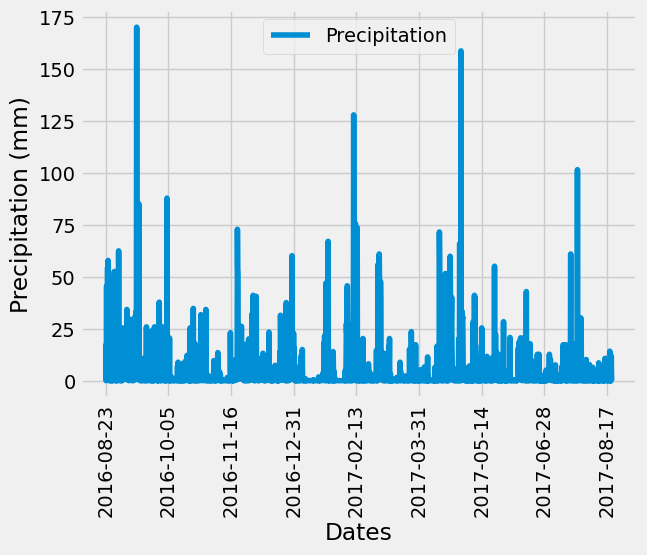

In [40]:
# Use Pandas Plotting with Matplotlib to plot the data
df_dates.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel('Dates')
plt.ylabel('Precipitation (mm)')

In [51]:
# Use Pandas to calculate the summary statistics for the precipitation data
#Calculate sats
prcp_count = df_dates['Precipitation'].count()
prcp_mean = df_dates['Precipitation'].mean()
prcp_std = df_dates['Precipitation'].std()
prcp_min = df_dates['Precipitation'].min()
prcp_max = df_dates['Precipitation'].max()

quartiles = df_dates['Precipitation'].quantile([0.25,0.5,0.75])
prcp_lowerq = quartiles[0.25]
prcp_midq = quartiles[0.5]
prcp_upperq = quartiles[0.75]

#create dictionary with stats
prcp_stats_dict = {
    'Count': prcp_count,
    'Mean': prcp_mean,
    'std': prcp_std,
    'Min': prcp_min,
    '25%': prcp_lowerq,
    '50%': prcp_midq,
    '75%': prcp_upperq,
    'Max': prcp_max
}

#Convert to df
prcp_stats_df = pd.DataFrame([prcp_stats_dict]).transpose()
prcp_stats_df

,0
Count,2021.000000
Mean,4.505888
std,11.713487
Min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
Max,170.200000


# Exploratory Station Analysis

In [52]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.station).distinct().count()
print(station_count)

9


In [54]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count_grouped = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).\
all()
station_count_grouped

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [71]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#save most active station
most_active_station = station_count_grouped[0][0]

#lowest temp
lowest_temp = \
session.query(func.min(Measurement.tobs)).\
filter(Measurement.station == most_active_station).all()

#highest temp
highest_temp = \
session.query(func.max(Measurement.tobs)).\
filter(Measurement.station == most_active_station).all()
#average temp
ave_temp = \
session.query(func.avg(Measurement.tobs)).\
filter(Measurement.station == most_active_station).all()
#print results
print(f"Most active station: {most_active_station}")
print(f"Lowest temp:{lowest_temp[0]}")
print(f"Highest temp:{highest_temp[0]}")
print(f"Average temp:{ave_temp[0]}")

Most active station: USC00519281
Lowest temp:(12.2,)
Highest temp:(29.4,)
Average temp:(22.03582251082252,)


In [57]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
temp_data = session.query(func.round(Measurement.tobs,0)).\
filter(Measurement.date >= year_ago, Measurement.station == most_active_station).\
order_by((func.round(Measurement.tobs,0))).all()
temp_data

[(15.0,),
 (15.0,),
 (15.0,),
 (16.0,),
 (16.0,),
 (16.0,),
 (17.0,),
 (17.0,),
 (17.0,),
 (17.0,),
 (17.0,),
 (17.0,),
 (17.0,),
 (17.0,),
 (17.0,),
 (17.0,),
 (18.0,),
 (18.0,),
 (18.0,),
 (18.0,),
 (18.0,),
 (18.0,),
 (18.0,),
 (18.0,),
 (18.0,),
 (18.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (19.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (20.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (21.0,),
 (22.0,),


In [58]:
#Convert temperature data to df
temp_data_df = pd.DataFrame(temp_data, columns=['Temperature'])
temp_data_df

,Temperature
0,15.0
1,15.0
2,15.0
3,16.0
4,16.0
...,...
347,27.0
348,28.0
349,28.0
350,28.0


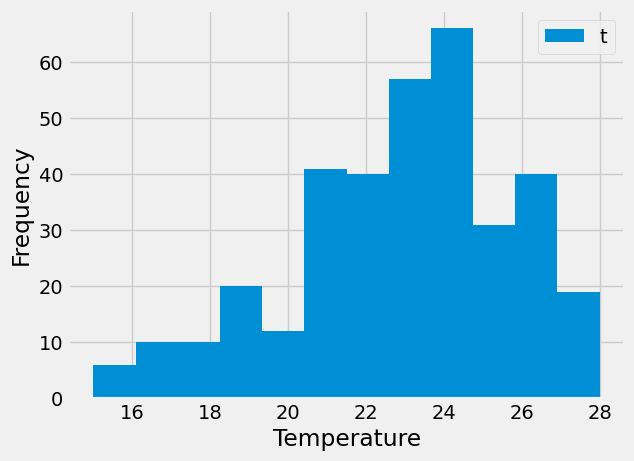

In [67]:
#plot histogram
plt.hist(x=temp_data_df, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend('tobs')
plt.show()

# Close Session

In [68]:
# Close Session
session.close()